- 보스턴 집값예측
- linear

In [100]:
import pandas as pd
import torch
import torch.nn.functional as f
import torch.nn as nn
import torch.optim as optimize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [101]:
bostonDF=pd.read_csv('boston.csv')
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [102]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [103]:
target=bostonDF[['MEDV']]
feature=bostonDF.drop(columns='MEDV')

# tensor로 변경
featureTS=torch.from_numpy(feature.values).float()
targetTS=torch.from_numpy(target.values).float()

print(f'feature : {featureTS.shape}, target : {targetTS.shape}')

feature : torch.Size([506, 13]), target : torch.Size([506, 1])


In [104]:
# 데이터셋 분리
X_train,X_test,y_train,y_test=train_test_split(featureTS,targetTS,
                                               test_size=0.2)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             test_size=0.2)

print(f'X_train : {X_train.shape}, X_val : {X_val.shape}, X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}, y_val : {y_val.shape}, y_test : {y_test.shape}')

X_train : torch.Size([323, 13]), X_val : torch.Size([81, 13]), X_test : torch.Size([102, 13])
y_train : torch.Size([323, 1]), y_val : torch.Size([81, 1]), y_test : torch.Size([102, 1])


In [105]:
# 스케일링
scale=MinMaxScaler()
scale.fit(X_train)
X_train=torch.from_numpy(scale.transform(X_train)).float()
X_val=torch.from_numpy(scale.transform(X_val)).float()
X_test=torch.from_numpy(scale.transform(X_test)).float()

In [106]:
# 모델 인스턴스 호출
model=nn.Linear(13,1)
opti=optimize.Adam(model.parameters(),lr=1)

In [107]:
def testing(X,Y):
    with torch.no_grad():
        
        pred_y=model(X)

        test_loss=f.mse_loss(pred_y,Y)

    return test_loss

In [108]:
def training(X_train,y_train,X_val,y_val,X_test,y_test,EPOCH):
    loss_list=[[],[],[]]
    for epoch in range(EPOCH):
        pred_y=model(X_train)
        
        # train, val, test
        

        # train
        train_loss=f.mse_loss(pred_y,y_train)

        opti.zero_grad()
        train_loss.backward()
        opti.step()
        loss_list[0].append(train_loss.item())

        # val
        val_loss=testing(X_val,y_val)
        loss_list[1].append(val_loss.item())

        # testing
        test_loss=testing(X_test,y_test)
        loss_list[2].append(test_loss.item())


        print(f'[{epoch+1}/{EPOCH}] train_loss : {train_loss}, val_loss : {val_loss}, test_loss : {test_loss}')
    
    return loss_list

In [109]:
epoch=100
loss_list=training(X_train,y_train,X_val,y_val,X_test,y_test,epoch)

[1/100] train_loss : 553.7681884765625, val_loss : 388.3118591308594, test_loss : 384.7665100097656
[2/100] train_loss : 340.91552734375, val_loss : 243.55352783203125, test_loss : 232.6539764404297
[3/100] train_loss : 205.994384765625, val_loss : 169.69349670410156, test_loss : 151.1025848388672
[4/100] train_loss : 143.42649841308594, val_loss : 151.53834533691406, test_loss : 126.00008392333984
[5/100] train_loss : 136.4529266357422, val_loss : 163.3435516357422, test_loss : 133.04527282714844
[6/100] train_loss : 157.51962280273438, val_loss : 179.14990234375, test_loss : 147.12921142578125
[7/100] train_loss : 179.4918212890625, val_loss : 183.73394775390625, test_loss : 152.79576110839844
[8/100] train_loss : 186.9633026123047, val_loss : 173.60928344726562, test_loss : 145.71644592285156
[9/100] train_loss : 176.947998046875, val_loss : 152.42665100097656, test_loss : 128.637451171875
[10/100] train_loss : 153.86109924316406, val_loss : 126.59184265136719, test_loss : 107.23165

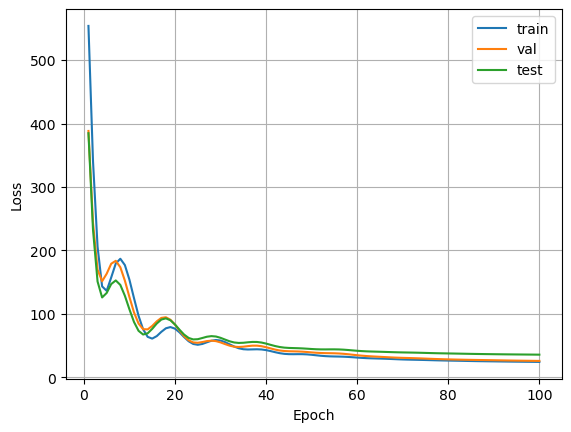

In [110]:
plt.plot(range(1,epoch+1),loss_list[0],label='train')
plt.plot(range(1,epoch+1),loss_list[1],label='val')
plt.plot(range(1,epoch+1),loss_list[2],label='test')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()